In this notebook i'm manually going through some of the filter example from the computer vison lecture notes

In [1]:
import numpy as np

In [3]:
a=np.array([[1,2,3],
            [4,5,6],
            [7,8,9]])
print(a)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [65]:
#left 
sobel=np.array([[ 1, 0,-1],
                [ 2, 0,-2],
                [ 1, 0,-1]])

def apply_kernel(window, kernel):
    k, l = kernel.shape
    total= 0
    for n in range(0,k):
        for m in range(0,l):
            total+=window[n][m]*kernel[n][m]
    #total=total/k*l nomalise
    return total

## move across image
def scan_window(img, kernel):
    k, l = kernel.shape
    output=np.zeros(img.shape)
    _img = np.pad(img, pad_width=1)
    for n in range(0,img.shape[0]):
        for m in range(0,img.shape[1]):
            #print("m = ", m)
            window=_img[n:n+k, m:m+l]
            #print(window)
            output[n][m]=apply_kernel(window, kernel)
    return(output)
scan_window(a, sobel)

array([[ -9.,  -6.,   9.],
       [-20.,  -8.,  20.],
       [-21.,  -6.,  21.]])

In [66]:
example=np.array([[10,10,20,20,20],
         [10,10,20,20,20],
         [10,10,20,20,20],
         [10,10,20,20,20],
         [10,10,20,20,20]])

_kernel= (1/3)*np.array([[ 1, 1, 1],
                         [ 0, 0, 0],
                         [-1,-1,-1]])

scan_window(example, _kernel)

array([[-6.66666667e+00, -1.33333333e+01, -1.66666667e+01,
        -2.00000000e+01, -1.33333333e+01],
       [ 0.00000000e+00,  8.88178420e-16,  0.00000000e+00,
         1.77635684e-15,  0.00000000e+00],
       [ 0.00000000e+00,  8.88178420e-16,  0.00000000e+00,
         1.77635684e-15,  0.00000000e+00],
       [ 0.00000000e+00,  8.88178420e-16,  0.00000000e+00,
         1.77635684e-15,  0.00000000e+00],
       [ 6.66666667e+00,  1.33333333e+01,  1.66666667e+01,
         2.00000000e+01,  1.33333333e+01]])

https://www.cs.auckland.ac.nz/courses/compsci373s1c/PatricesLectures/Sobel-erosion-dilation%20examples.pdf

In [67]:
example=np.array([[17, 14, 13, 9, 17],
                  [21, 64, 62, 41, 19],
                  [42, 54, 61, 62, 40],
                  [41, 30,31,34,38],
                  [ 20, 24,40,38,35]])

_kernel= (1/3)*np.array([[ 1, 1, 1],
                         [ 1, 1, 1],
                         [ 1, 1, 1]])

scan_window(example, _kernel)

array([[ 38.66666667,  63.66666667,  67.66666667,  53.66666667,
         28.66666667],
       [ 70.66666667, 116.        , 126.66666667, 108.        ,
         62.66666667],
       [ 84.        , 135.33333333, 146.33333333, 129.33333333,
         78.        ],
       [ 70.33333333, 114.33333333, 124.66666667, 126.33333333,
         82.33333333],
       [ 38.33333333,  62.        ,  65.66666667,  72.        ,
         48.33333333]])

### Example of 2D Convolution

http://www.songho.ca/dsp/convolution/convolution2d_example.html

In [74]:
## non flipped 
kernel= np.array([[ -1, -2, -1],
                   [  0,  0,  0],
                   [  1,  2,  1]])

flip = np.flip(kernel)
print("without flip (wrong) \n", scan_window(a, kernel))
print("with flip (correct) \n", scan_window(a, flip))

without flip (wrong) 
 [[ 13.  20.  17.]
 [ 18.  24.  18.]
 [-13. -20. -17.]]
with flip (correct) 
 [[-13. -20. -17.]
 [-18. -24. -18.]
 [ 13.  20.  17.]]


## Recap: derivate filter (Prewitt)
merged pdf pg 319
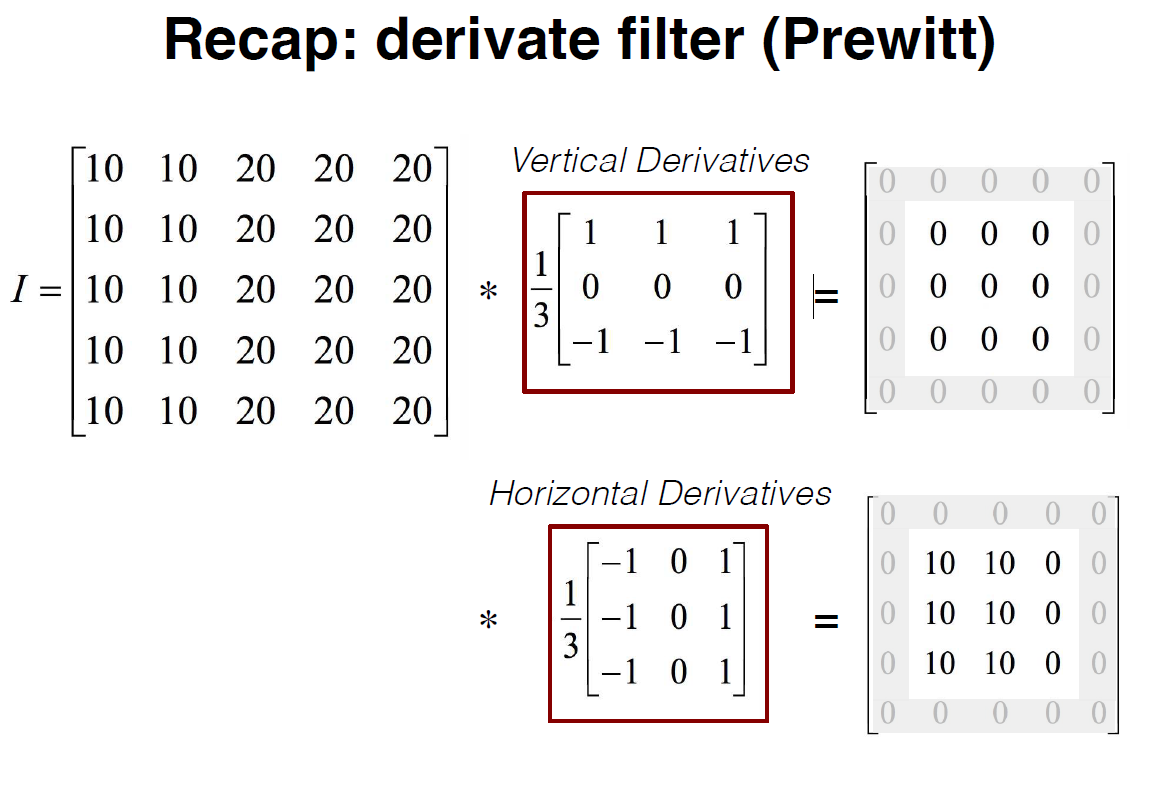

In [88]:
#Why no flip correction here?
#But results match notes

I =np.array([[10,10,20,20,20],
             [10,10,20,20,20],
             [10,10,20,20,20],
             [10,10,20,20,20],
             [10,10,20,20,20]])

print("vertical derivative matrix------------")
v_der= (1/3)*np.array([[ 1, 1, 1],
                       [ 0, 0, 0],
                       [-1,-1,-1]])
print(v_der)

print("only the center makes sense as other part is including our 0 edge")
print("using as is ")
v_sc= scan_window(I, v_der)
print(v_sc)
print("therfore")
print(np.round(v_sc[1:v_sc.shape[0]-1, 1:v_sc.shape[1]-1]))
print("horizontal derivative matrix----------")

h_der= (1/3)*np.array([[-1, 0, 1],
                       [-1, 0, 1],
                       [-1,-0, 1]])
print(h_der)
h_sc= scan_window(I, h_der)
print(h_sc)
print("therfore")
print(np.round(h_sc[1:h_sc.shape[0]-1, 1:h_sc.shape[1]-1]))

vertical derivative matrix------------
[[ 0.33333333  0.33333333  0.33333333]
 [ 0.          0.          0.        ]
 [-0.33333333 -0.33333333 -0.33333333]]
only the center makes sense as other part is including our 0 edge
using as is 
[[-6.66666667e+00 -1.33333333e+01 -1.66666667e+01 -2.00000000e+01
  -1.33333333e+01]
 [ 0.00000000e+00  8.88178420e-16  0.00000000e+00  1.77635684e-15
   0.00000000e+00]
 [ 0.00000000e+00  8.88178420e-16  0.00000000e+00  1.77635684e-15
   0.00000000e+00]
 [ 0.00000000e+00  8.88178420e-16  0.00000000e+00  1.77635684e-15
   0.00000000e+00]
 [ 6.66666667e+00  1.33333333e+01  1.66666667e+01  2.00000000e+01
   1.33333333e+01]]
therfore
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
horizontal derivative matrix----------
[[-0.33333333  0.          0.33333333]
 [-0.33333333  0.          0.33333333]
 [-0.33333333  0.          0.33333333]]
[[  6.66666667   6.66666667   6.66666667   0.         -13.33333333]
 [ 10.          10.          10.           0.         -20.        ]

### real image
Maybe apply to real image?  
Do canney edge detection?

In [95]:
import requests
import imageio
from io import BytesIO

url ="https://th.bing.com/th/id/OIP.mJKv6eD1XuWTvf1hZSoqPwHaE8?pid=ImgDet&rs=1"
res = requests.get(url)
img_arr = imageio.imread(BytesIO(res.content))


In [96]:
img_arr

Array([[[ 37,  73, 133],
        [ 37,  73, 133],
        [ 37,  73, 133],
        ...,
        [ 44,  89, 148],
        [ 46,  91, 150],
        [ 46,  91, 150]],

       [[ 37,  73, 133],
        [ 37,  73, 133],
        [ 37,  73, 133],
        ...,
        [ 43,  88, 147],
        [ 45,  90, 149],
        [ 45,  90, 149]],

       [[ 37,  73, 133],
        [ 37,  73, 133],
        [ 37,  73, 133],
        ...,
        [ 41,  86, 145],
        [ 44,  89, 148],
        [ 44,  89, 148]],

       ...,

       [[209, 203, 203],
        [214, 208, 208],
        [199, 193, 193],
        ...,
        [188, 195, 201],
        [141, 148, 154],
        [138, 145, 151]],

       [[205, 199, 199],
        [208, 202, 202],
        [191, 185, 185],
        ...,
        [194, 199, 203],
        [202, 207, 211],
        [200, 205, 209]],

       [[195, 186, 187],
        [203, 194, 195],
        [195, 186, 187],
        ...,
        [194, 199, 202],
        [198, 203, 206],
        [196, 201, 204]]